# Projeto: Análise de Ações da B3

Este projeto tem como objetivo analisar os dados históricos de ações da Bolsa de Valores brasileira (B3), utilizando Python, Pandas e visualizações gráficas.

# Coleta dos Dados

- Importar as bibliotecas necessárias
- Definir o ticker da ação
- Baixar os dados históricos utilizando a biblioteca `yfinance`

In [23]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

%matplotlib inline

ticker = 'PETR4.SA'

dados = yf.download(ticker, start='2020-01-01', end='2024-12-31')

dados.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA
Date,,,,,
2020-01-02,9.825956,9.825956,9.701131,9.765144,37774500
2020-01-03,9.745940,9.998790,9.745940,9.883567,71595600
2020-01-06,9.861165,9.902774,9.585911,9.739541,81844000
2020-01-07,9.822758,9.883569,9.752343,9.864366,32822000
2020-01-08,9.761946,9.848363,9.678729,9.822758,48215600


# Etapa 2 - Limpeza e Manipulação dos Dados

- Verificar se existem valores nulos
- Renomear as colunas para o português
- Criar uma coluna com o retorno diário da ação (%)


In [24]:
# Verificar valores nulos
print("Valores nulos por coluna:")
print(dados.isnull().sum())

Valores nulos por coluna:
Price   Ticker  
Close   PETR4.SA    0
High    PETR4.SA    0
Low     PETR4.SA    0
Open    PETR4.SA    0
Volume  PETR4.SA    0
dtype: int64


In [25]:
# Renomear colunas
dados.rename(columns={
    'Open': 'Abertura',
    'High': 'Alta',
    'Low': 'Baixa',
    'Close': 'Fechamento',
    'Adj Close': 'Fechamento Ajustado',
    'Volume': 'Volume'
}, inplace=True)

In [26]:
# Calcular retorno diário (%)
dados['Retorno Diário (%)'] = dados['Fechamento'].pct_change() * 100

# Análise Visual dos Dados

- Evolução do preço de fechamento
- Retorno diário (%), que mostra a variação da ação no curto prazo

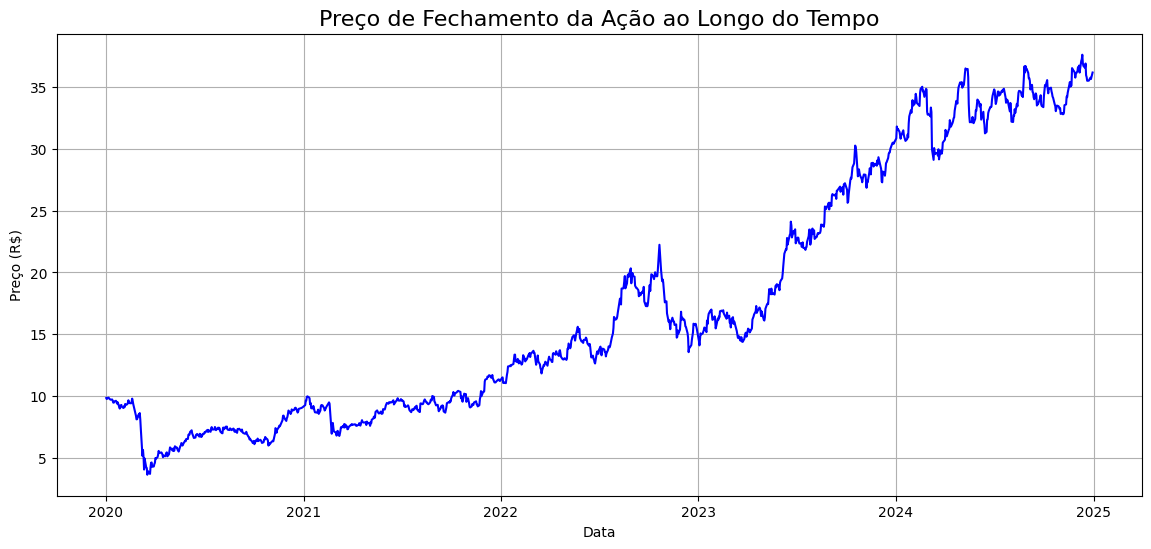

In [27]:
# Evolução do preço de fechamento
plt.figure(figsize=(14,6))
plt.plot(dados.index, dados['Fechamento'], color='blue')
plt.title('Preço de Fechamento da Ação ao Longo do Tempo', fontsize=16)
plt.xlabel('Data')
plt.ylabel('Preço (R$)')
plt.grid(True)
plt.show()

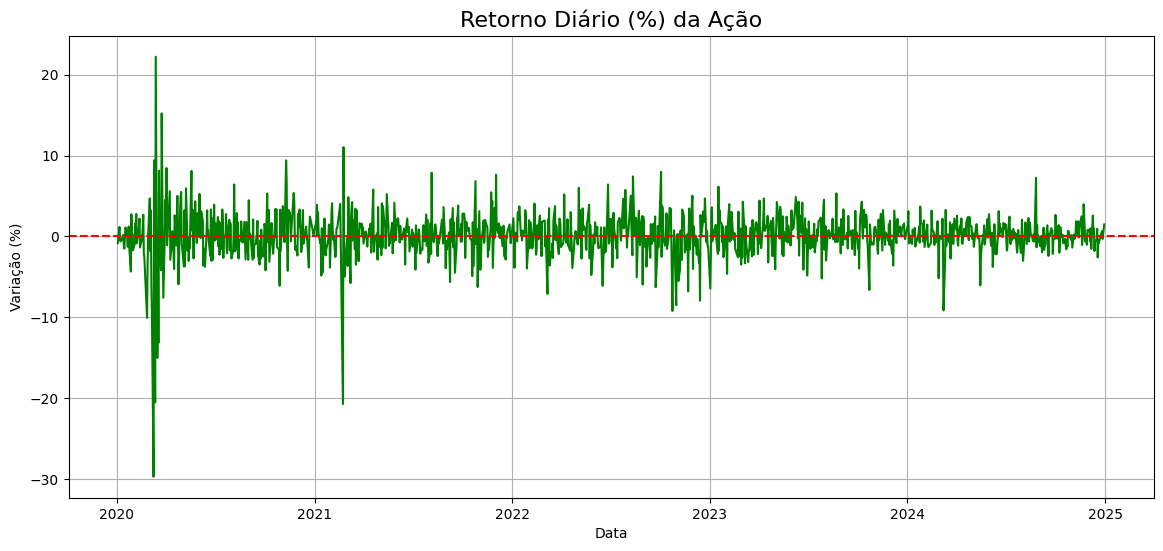

In [28]:
# Retorno diário (%)
plt.figure(figsize=(14,6))
plt.plot(dados.index, dados['Retorno Diário (%)'], color='green')
plt.title('Retorno Diário (%) da Ação', fontsize=16)
plt.xlabel('Data')
plt.ylabel('Variação (%)')
plt.axhline(y=0, color='red', linestyle='--')  # Linha zero para referência
plt.grid(True)
plt.show()

# Análise de Média Móvel e Volatilidade

- Calcular a Média Móvel de 20 dias (MA20)
- Calcular a Volatilidade de 20 dias com base no retorno diário
- Visualizar ambas em gráficos separados


In [29]:
# Média Móvel de 20 dias
dados['Média Móvel 20 dias'] = dados['Fechamento'].rolling(window=20).mean()

# Volatilidade (Desvio padrão dos retornos em 20 dias)
dados['Volatilidade 20 dias'] = dados['Retorno Diário (%)'].rolling(window=20).std()

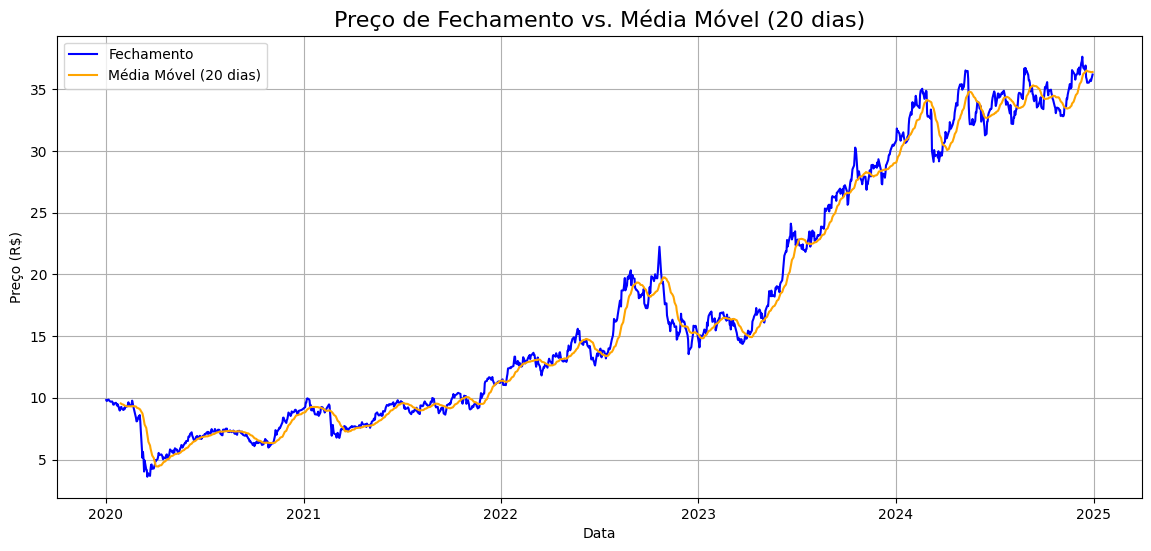

In [30]:
# Fechamento + Média Móvel
plt.figure(figsize=(14,6))
plt.plot(dados['Fechamento'], label='Fechamento', color='blue')
plt.plot(dados['Média Móvel 20 dias'], label='Média Móvel (20 dias)', color='orange')
plt.title('Preço de Fechamento vs. Média Móvel (20 dias)', fontsize=16)
plt.xlabel('Data')
plt.ylabel('Preço (R$)')
plt.legend()
plt.grid(True)
plt.show()

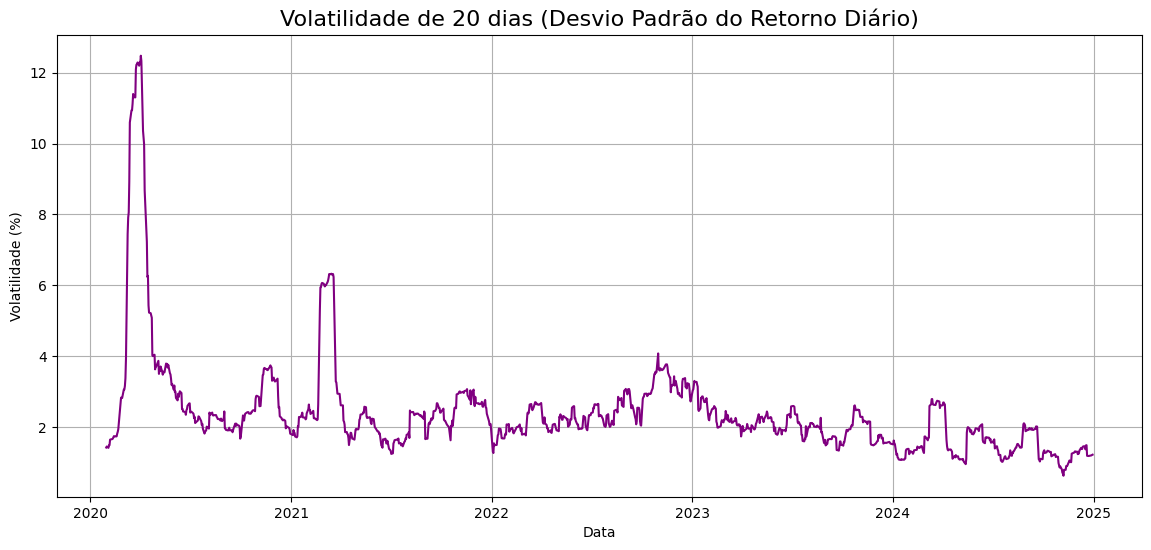

In [31]:
# Volatilidade
plt.figure(figsize=(14,6))
plt.plot(dados['Volatilidade 20 dias'], color='purple')
plt.title('Volatilidade de 20 dias (Desvio Padrão do Retorno Diário)', fontsize=16)
plt.xlabel('Data')
plt.ylabel('Volatilidade (%)')
plt.grid(True)
plt.show()

# Comparando PETR4 com VALE3

Vamos repetir a análise para a ação VALE3.SA:
- Coletar os dados
- Calcular retorno diário
- Calcular média móvel e volatilidade
- Comparar visualmente com PETR4.SA


In [32]:
# Coletando dados da VALE3
vale = yf.download('VALE3.SA', start='2020-01-01', end='2024-12-31')

# Renomeando colunas pra facilitar
vale.rename(columns={'Close': 'Fechamento'}, inplace=True)

# Retorno diário da VALE3
vale['Retorno Diário (%)'] = vale['Fechamento'].pct_change() * 100

# Média móvel e volatilidade (20 dias)
vale['Média Móvel 20 dias'] = vale['Fechamento'].rolling(window=20).mean()
vale['Volatilidade 20 dias'] = vale['Retorno Diário (%)'].rolling(window=20).std()


[*********************100%***********************]  1 of 1 completed


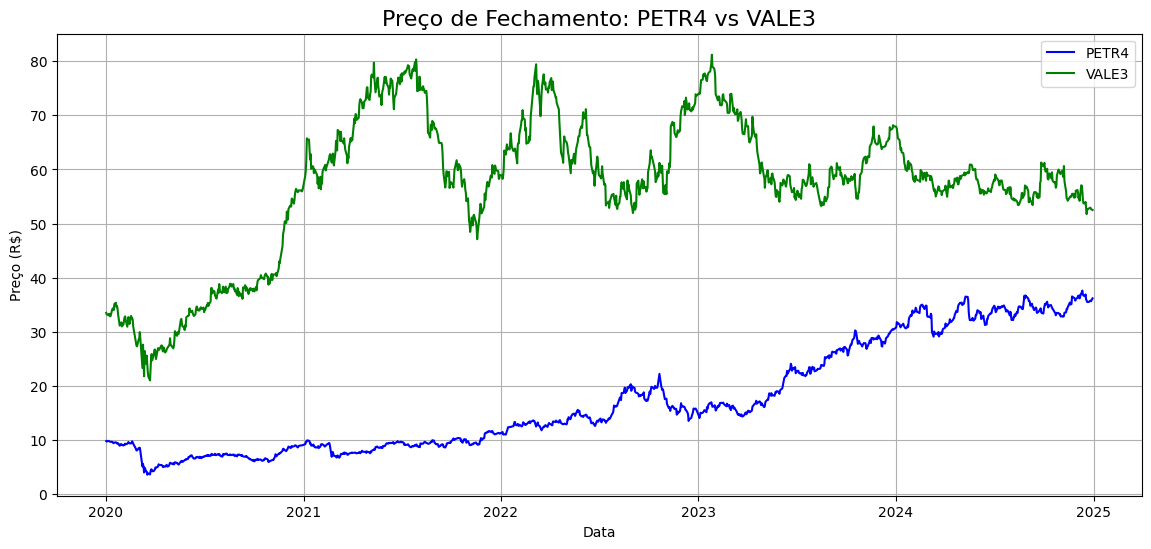

In [33]:
plt.figure(figsize=(14,6))
plt.plot(dados['Fechamento'], label='PETR4', color='blue')
plt.plot(vale['Fechamento'], label='VALE3', color='green')
plt.title('Preço de Fechamento: PETR4 vs VALE3', fontsize=16)
plt.xlabel('Data')
plt.ylabel('Preço (R$)')
plt.legend()
plt.grid(True)
plt.show()

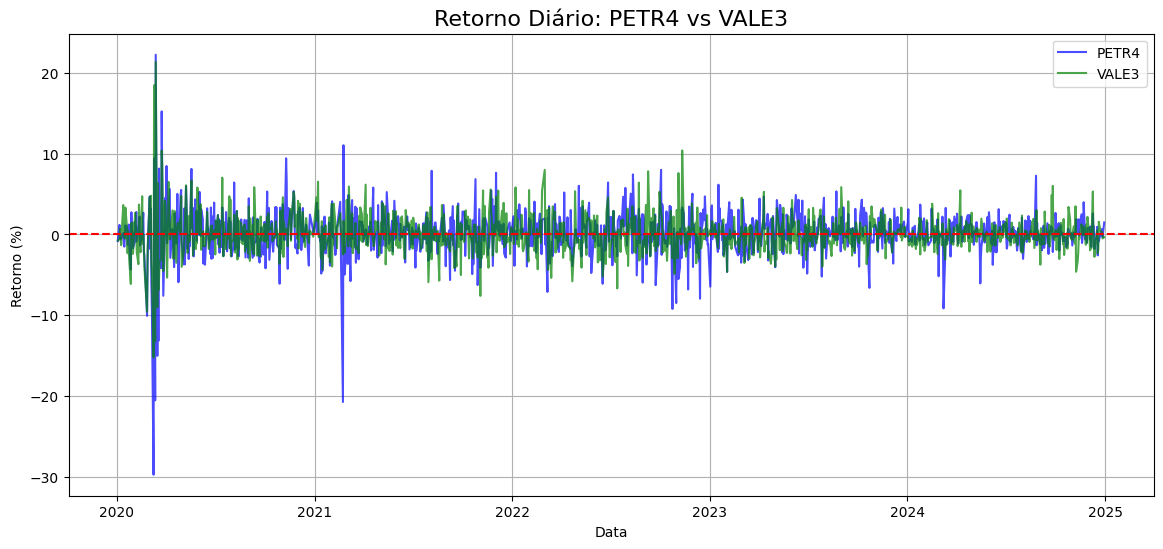

In [34]:
plt.figure(figsize=(14,6))
plt.plot(dados['Retorno Diário (%)'], label='PETR4', alpha=0.7, color='blue')
plt.plot(vale['Retorno Diário (%)'], label='VALE3', alpha=0.7, color='green')
plt.title('Retorno Diário: PETR4 vs VALE3', fontsize=16)
plt.xlabel('Data')
plt.ylabel('Retorno (%)')
plt.axhline(y=0, color='red', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()